# Lotka–Volterra Like Systems With Generalised Exponent

This work seeks the complete analytic solution of the 2 mode Lotka-Volterra nonlinear coupled ordinary differential equations and explores reaching that aim by considering the Lotka-Volterra as a limiting case of a generalised system with parameterised exponents.


Nonlinear differential equations (includes nice discussion of Lotka–Volterra 2 mode systems for species populations)

https://www-users.cse.umn.edu/~olver/ln_/odq.pdf

Other solutions to Lotka–Volterra

https://www.itm-conferences.org/articles/itmconf/pdf/2019/06/itmconf_iccmae2018_01016.pdf

Some elliptic solutions to Lotka-Volterra (3 modes) Robert S Maier at Arizona has written a few papers

https://arxiv.org/pdf/1211.5813.pdf

https://arxiv.org/pdf/1203.0283.pdf

https://arxiv.org/pdf

Some good refs here:

https://arxiv.org/pdf/2303.09317.pdf

Lagrangians for LV

https://docs.juliahub.com/GeometricProblems/4fHs6/0.1.8/lotka_volterra_2d/

Logistic differential equation
https://www-users.cse.umn.edu/~olver/ln_/odq.pdf/0807.1081.pdf

In [132]:
from sympy import *
(x, y, X, Y, Z, B, C, n, m, l, j, q, N, M, K, k, epsilon, z, s, p1, p2, p3, g2, g3,
 z0, w1, w2, w3, e1, e2, e3, Delta, 
 omega1, omega2, omega3, eta1, eta2, eta3, d1, d2, d3) = symbols(
    '''x, y, X, Y, Z, B, C, n, m, l, j, q, N, M, K, k, epsilon, z, s, p1, p2, p3, g2, g3,
    z0, w1, w2, w3, e1, e2, e3, Delta, 
    omega1, omega2, omega3, eta1, eta2, eta3, d1, d2, d3'''
)
alpha, delta, t, nu, epsilon, theta = symbols('alpha, delta, t, nu, epsilon, theta')
pw = Function('pw') # Weierstrass P function
pwp = Function('pwp') # Derivative of Weierstrass P function
zw = Function('zw') # Weierstrass Zeta function
sigma = Function('sigma') # Weierstrass Sigma function
rho = Function('rho')
f = Function('f')
h = Function('h')
s = Function('s')
u = Function('u')
v = Function('v')
P = Function('P') # Polynomial
Q = Function('Q') # Polynomial
R = Function('') # Polynomial
phi = Function('phi')
Phi = Function('Phi')
phi1 = Function('phi1')
phi2 = Function('phi2')
phi3 = Function('phi3')
A = Function('A')
Ac = Function('Ac')
A1 = Function('A1')
A2 = Function('A2')
A3 = Function('A3')
Ac1 = Function('Ac1')
Ac2 = Function('Ac2')
Ac3 = Function('Ac3')
A4 = Function('A4')
A5 = Function('A5')
A6 = Function('A6')
A7 = Function('A7')
A8 = Function('A8')
W1 = Function('W1')
W2 = Function('W2')
W3 = Function('W3')
W4 = Function('W4')
W5 = Function('W5')
W6 = Function('W6')
Det = Function("Det")

kappa = IndexedBase('kappa')
beta = IndexedBase('beta')
mu = IndexedBase('mu')
xi = IndexedBase('xi')
a = IndexedBase('a')
b = IndexedBase('b')
c = IndexedBase('c')
d = IndexedBase('d')
p = IndexedBase('p')
G = IndexedBase('G')
psi = IndexedBase('psi')
upsilon = IndexedBase('upsilon')
WPdet = Function('WPdet')

Omega = IndexedBase('Omega')
T = Function('T')
V = Function('V')
Dz = Function('Dz') # Derivate w.r.t z
L = Function('L')
U = Function("U")
W = Function("W")
from math import prod

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [133]:
pw_to_zw_identity = Eq(
    (pwp(x,g2,g3) - pwp(y,g2,g3))/(pw(x,g2,g3) - pw(y,g2,g3))/2,
    zw(x + y,g2, g3) - zw(x,g2, g3) - zw(y,g2, g3)
)
pw_to_zw_identity

Eq((pwp(x, g2, g3) - pwp(y, g2, g3))/(2*(pw(x, g2, g3) - pw(y, g2, g3))), -zw(x, g2, g3) - zw(y, g2, g3) + zw(x + y, g2, g3))

In [134]:
diff_zeta_eq = Eq(diff(zw(z,g2,g3),z), -pw(z,g2,g3))
diff_zeta_eq

Eq(Derivative(zw(z, g2, g3), z), -pw(z, g2, g3))

In [135]:
integral_zeta_log_sigma = Eq(Integral(zw(z,g2,g3),z),log(sigma(z,g2,g3)))
integral_zeta_log_sigma

Eq(Integral(zw(z, g2, g3), z), log(sigma(z, g2, g3)))

In [136]:
sigma_zeta_eq = Eq(diff(integral_zeta_log_sigma.lhs,z)*sigma(z,g2,g3)/zw(z,g2,g3), 
             diff(integral_zeta_log_sigma.rhs,z)*sigma(z,g2,g3)/zw(z,g2,g3))
sigma_zeta_eq

Eq(sigma(z, g2, g3), Derivative(sigma(z, g2, g3), z)/zw(z, g2, g3))

In [137]:
pwp_sigma_id = Eq(pwp(z,g2,g3),-sigma(2*z,g2,g3)/sigma(z,g2,g3)**4)
pwp_sigma_id

Eq(pwp(z, g2, g3), -sigma(2*z, g2, g3)/sigma(z, g2, g3)**4)

In [138]:
sigma_period_eq_1n = Eq(sigma(z + 2 * n * omega1, g2, g3), 
                       (-1) **n * sigma(z, g2, g3) * exp(2 * n * eta1 * (n * omega1 + z)))
sigma_period_eq_1n

Eq(sigma(2*n*omega1 + z, g2, g3), (-1)**n*sigma(z, g2, g3)*exp(2*eta1*n*(n*omega1 + z)))

## Euler Lagrange Equations

In [139]:
euler_lagrange_eqs = [Eq(Derivative(L(u(z),v(z),diff(u(z),z),diff(v(z),z)),f) - 
Derivative(Derivative(L(u(z),v(z),diff(u(z),z),diff(v(z),z)),Derivative(f,z)),z),0) for f in [u(z), v(z)]]
for el in euler_lagrange_eqs:
    el 

Eq(Derivative(L(u(z), v(z), Derivative(u(z), z), Derivative(v(z), z)), u(z)) - Derivative(L(u(z), v(z), Derivative(u(z), z), Derivative(v(z), z)), Derivative(u(z), z), z), 0)

Eq(Derivative(L(u(z), v(z), Derivative(u(z), z), Derivative(v(z), z)), v(z)) - Derivative(L(u(z), v(z), Derivative(u(z), z), Derivative(v(z), z)), Derivative(v(z), z), z), 0)

## The Lotka-Volterra System

This work aims to find solutions to this system which is known as the Lotka-Volterra system and describes predator-prey species competition dynamics. 

In [140]:

lk_kinetic  = ln(v(z))*Derivative(ln(u(z)),z)/2 - ln(u(z))*Derivative(ln(v(z)),z)/2

lk_potential = alpha*ln(v(z)) + beta*ln(u(z)) - delta*v(z) + kappa*u(z)
lk_lagrangian = Eq(L(u(z),v(z),diff(u(z),z),diff(v(z),z)), lk_kinetic - lk_potential)
lk_lagrangian

Eq(L(u(z), v(z), Derivative(u(z), z), Derivative(v(z), z)), -alpha*log(v(z)) + delta*v(z) - u(z)*kappa - log(u(z))*Derivative(log(v(z)), z)/2 - log(u(z))*beta + log(v(z))*Derivative(log(u(z)), z)/2)

In [141]:
dv1_lk = Eq(diff(u(z),z),solve(euler_lagrange_eqs[1].subs(*lk_lagrangian.args).doit() , diff(u(z),z))[0]).simplify().expand()
dv2_lk = Eq(diff(v(z),z),solve(euler_lagrange_eqs[0].subs(*lk_lagrangian.args).doit() , diff(v(z),z))[0]).simplify().expand()
dv1_lk
dv2_lk

Eq(Derivative(u(z), z), alpha*u(z) - delta*u(z)*v(z))

Eq(Derivative(v(z), z), -u(z)*v(z)*kappa - v(z)*beta)

In [142]:
diff(lk_potential,z).subs([dv1_lk.args, dv2_lk.args]).simplify()

0

## The Lotka-Volterra System with Generalised Exponents

The Lotka-Volterra system can be considered a special case of the folowing system in the limit that $x$ and $y$ go to 0.

In [143]:
lkg_kinetic  = (v(z)**x*Derivative(u(z)**y,z)/2 - u(z)**y*Derivative(v(z)**x,z)/2).doit()#.subs([(y,1-y),(x,1-x)])

lkg_potential = (alpha*y*v(z)**x + beta*x*u(z)**y - delta*x*y*v(z) + kappa*x*y*u(z))#.subs([(y,1-y),(x,1-x)])

lkg_lagrangian = Eq(L(u(z),v(z),diff(u(z),z),diff(v(z),z)), lkg_kinetic - lkg_potential)
lkg_lagrangian

Eq(L(u(z), v(z), Derivative(u(z), z), Derivative(v(z), z)), -alpha*y*v(z)**x + delta*x*y*v(z) - x*y*u(z)*kappa - x*u(z)**y*beta - x*u(z)**y*v(z)**x*Derivative(v(z), z)/(2*v(z)) + y*u(z)**y*v(z)**x*Derivative(u(z), z)/(2*u(z)))

In [144]:
dv1_lkg = Eq(diff(u(z),z),solve(euler_lagrange_eqs[1].subs(*lkg_lagrangian.args).doit() , diff(u(z),z))[0]).simplify().expand()
dv2_lkg = Eq(diff(v(z),z),solve(euler_lagrange_eqs[0].subs(*lkg_lagrangian.args).doit() , diff(v(z),z))[0]).simplify().expand()
dv1_lkg
dv2_lkg

Eq(Derivative(u(z), z), alpha*u(z)**(1 - y) - delta*u(z)**(1 - y)*v(z)/v(z)**x)

Eq(Derivative(v(z), z), -u(z)*v(z)**(1 - x)*kappa/u(z)**y - v(z)**(1 - x)*beta)

In [145]:
series(x**(1-epsilon), epsilon)

x - epsilon*x*log(x) + epsilon**2*x*log(x)**2/2 - epsilon**3*x*log(x)**3/6 + epsilon**4*x*log(x)**4/24 - epsilon**5*x*log(x)**5/120 + O(epsilon**6)

In [146]:
k_conserved = Eq(k, lkg_potential)
k_conserved

Eq(k, alpha*y*v(z)**x - delta*x*y*v(z) + x*y*u(z)*kappa + x*u(z)**y*beta)

In [147]:
myExpr = diff(k_conserved.rhs,z).subs([dv1_lkg.args, dv2_lkg.args]).simplify()

#https://stackoverflow.com/questions/66556110/sympy-how-to-simplify-expression-with-exponential-functions
factor_terms(sum(powsimp(factor_terms(cancel(a))) for a in Add.make_args(myExpr.expand())))

0

In [148]:
Eq(dv1_lkg.lhs*u(z)**y/u(z), (dv1_lkg.rhs*u(z)**y/u(z))).simplify()
Eq(dv2_lkg.lhs*v(z)**x/v(z), (dv2_lkg.rhs*v(z)**x/v(z))).simplify()

Eq(u(z)**(y - 1)*Derivative(u(z), z), alpha - delta*v(z)/v(z)**x)

Eq(v(z)**(x - 1)*Derivative(v(z), z), -u(z)*kappa/u(z)**y - beta)

In [149]:
uy_eq = Eq(Derivative(u(z)**y,z)/y, (dv1_lkg.rhs*u(z)**y/u(z)).simplify().powsimp())
vx_eq = Eq(Derivative(v(z)**x,z)/x, (dv2_lkg.rhs*v(z)**x/v(z)).simplify().powsimp())
uy_eq
vx_eq

Eq(Derivative(u(z)**y, z)/y, alpha - delta*v(z)**(1 - x))

Eq(Derivative(v(z)**x, z)/x, -u(z)**(1 - y)*kappa - beta)

In [150]:
Eq(y*uy_eq.lhs*v(z)**x + x*vx_eq.lhs*u(z)**y, (y*uy_eq.rhs*v(z)**x + x*vx_eq.rhs*u(z)**y).expand().powsimp())

Eq(u(z)**y*Derivative(v(z)**x, z) + v(z)**x*Derivative(u(z)**y, z), alpha*y*v(z)**x - delta*y*v(z) - x*u(z)*kappa - x*u(z)**y*beta)

In [151]:
k_conserved

Eq(k, alpha*y*v(z)**x - delta*x*y*v(z) + x*y*u(z)*kappa + x*u(z)**y*beta)

In [152]:
dv1_lkg.lhs*u(z)**y/u(z) - diff(u(z)**y,z)/y

0

In [153]:
v_as_ln_diff_u_lk = Eq(v(z), solve(dv1_lk.lhs - dv1_lk.rhs,v(z))[0])
v_as_ln_diff_u_lk

Eq(v(z), alpha/delta - Derivative(u(z), z)/(delta*u(z)))

In [154]:
diff_u_only_eq_lk = Eq((dv2_lk.lhs - dv2_lk.rhs).subs(*v_as_ln_diff_u_lk.args),0)
diff_u_only_eq_lk

Eq((alpha/delta - Derivative(u(z), z)/(delta*u(z)))*u(z)*kappa + (alpha/delta - Derivative(u(z), z)/(delta*u(z)))*beta + Derivative(alpha/delta - Derivative(u(z), z)/(delta*u(z)), z), 0)

In [155]:
diff_u_only_eq_lk_expanded = (diff_u_only_eq_lk.doit().expand().lhs*u(z)**2*delta).expand()
diff_u_only_eq_lk_expanded

alpha*u(z)**3*kappa + alpha*u(z)**2*beta - u(z)**2*Derivative(u(z), z)*kappa - u(z)*Derivative(u(z), z)*beta - u(z)*Derivative(u(z), (z, 2)) + Derivative(u(z), z)**2

In [392]:
diff_u_only_eq_lk_expanded.subs(u(z),a*f(z)**x*exp(y*z)).doit().simplify().expand().collect(diff(f(z),z),factor)

-x*(f(z)**x*exp(y*z)*a*kappa + beta)*f(z)**x*f(z)**(x + 4)*exp(2*y*z)*Derivative(f(z), z)*a**2/f(z)**5 - x*f(z)**(2*x + 3)*exp(2*y*z)*Derivative(f(z), (z, 2))*a**2/f(z)**4 + x*f(z)**(2*x + 3)*exp(2*y*z)*Derivative(f(z), z)**2*a**2/f(z)**5 - (-alpha*f(z)**(2*x + 5) + y*f(z)**(x + 1)*f(z)**(x + 4))*(f(z)**x*exp(y*z)*a*kappa + beta)*exp(2*y*z)*a**2/f(z)**5

In [381]:
diff(diff(f(z),z)/f(z)).subs(f(z),exp(h(z))).doit().simplify()

Derivative(h(z), (z, 2))

## A solvable Lotka–Volterra like system
Thus far, solving the Lotka-Volterra system has proved difficult. In order to get some angle of attack, a Lagrangian is constructed that has at least some similarity with the LK system, but conserves a known quantity and can be solved using elliptic functions. This Lagrangian is as follows:

In [156]:
kinetic  = (u(z)*diff(v(z),z) - v(z)*diff(u(z),z))/2
potential = alpha*u(z)*v(z) +delta*u(z)*v(z)**2 + beta*u(z)**2*v(z)
lagrangian = Eq(L(u(z),v(z),diff(u(z),z),diff(v(z),z)), kinetic - potential)
lagrangian

Eq(L(u(z), v(z), Derivative(u(z), z), Derivative(v(z), z)), -alpha*u(z)*v(z) - delta*u(z)*v(z)**2 - u(z)**2*v(z)*beta + u(z)*Derivative(v(z), z)/2 - v(z)*Derivative(u(z), z)/2)

In [157]:
lkg_lagrangian.subs([(y,y),(x,x)])

Eq(L(u(z), v(z), Derivative(u(z), z), Derivative(v(z), z)), -alpha*y*v(z)**x + delta*x*y*v(z) - x*y*u(z)*kappa - x*u(z)**y*beta - x*u(z)**y*v(z)**x*Derivative(v(z), z)/(2*v(z)) + y*u(z)**y*v(z)**x*Derivative(u(z), z)/(2*u(z)))

So it can be seen that the difference with the LK system and this one, is the $u(z)^2, v(z)^2$ terms in this example:

In [158]:
dv1 = Eq(diff(v(z),z),solve(euler_lagrange_eqs[0].subs(*lagrangian.args).doit() , diff(v(z),z))[0]).expand()
dv2 = Eq(diff(u(z),z),solve(euler_lagrange_eqs[1].subs(*lagrangian.args).doit() , diff(u(z),z))[0]).expand()
dv1
dv2

Eq(Derivative(v(z), z), alpha*v(z) + delta*v(z)**2 + 2*u(z)*v(z)*beta)

Eq(Derivative(u(z), z), -alpha*u(z) - 2*delta*u(z)*v(z) - u(z)**2*beta)

The system can easily be rescaled to reduce the number of paramters:

In [159]:
dv1_scaled = dv1.subs([(u(z),u(z)/beta),(v(z),v(z)/delta)])
dv2_scaled = dv2.subs([(u(z),u(z)/beta),(v(z),v(z)/delta)])
dv1_scaled = Eq(dv1_scaled.lhs*delta, dv1_scaled.rhs*delta).simplify()
dv2_scaled = Eq(dv2_scaled.lhs*beta, dv2_scaled.rhs*beta).simplify()
dv1_scaled
dv2_scaled

Eq(Derivative(v(z), z), (alpha + 2*u(z) + v(z))*v(z))

Eq(Derivative(u(z), z), (-alpha - u(z) - 2*v(z))*u(z))

In [269]:
vz_single_eq = Eq(((dv2_scaled.lhs - dv2_scaled.rhs).subs(u(z), solve(dv1_scaled,u(z))[0].expand()).doit()*v(z)**2*4).expand(),0)


Eq(-alpha**2*v(z)**2 - 4*alpha*v(z)**3 - 3*v(z)**4 + 2*v(z)*Derivative(v(z), (z, 2)) - Derivative(v(z), z)**2, 0)

In [292]:
_xsss = Eq(((vz_single_eq.lhs.subs(v(z),f(z)**2).doit()/f(z)**3).subs(f(z),h(z)*sqrt(alpha))/sqrt(alpha)**5).expand(),0).doit().simplify()
_xsss

Eq(3*h(z)**5 + 4*h(z)**3 + h(z) - 4*Derivative(h(z), (z, 2))/alpha**2, 0)

In [307]:
solve((3*x**5+4*x**3+x).factor(),x)

[0, -I, I, -sqrt(3)*I/3, sqrt(3)*I/3]

It conserves the following quantity:

In [160]:
potential_scaled = Eq(p,potential.subs([(delta,1),(beta,1)]))
potential_scaled

Eq(p, alpha*u(z)*v(z) + u(z)**2*v(z) + u(z)*v(z)**2)

In [161]:
diff(potential_scaled.rhs.expand(),z).subs([dv1_scaled.args, dv2_scaled.args]).expand()

0

### Weierstrass sigma function solutions

It is easily shown that the product $u(z)v(z)$ (plus a constant) solves the differential Weierstrass P function:

In [162]:
p_sqrd_terms = Eq((p - alpha*u(z)*v(z))**2,(potential_scaled.rhs.expand() - alpha*u(z)*v(z))**2)
p_sqrd_terms

Eq((-alpha*u(z)*v(z) + p)**2, (u(z)**2*v(z) + u(z)*v(z)**2)**2)

In [163]:
duv_sqrd = Eq(Derivative(u(z)*v(z),z)**2, ((diff(u(z)*v(z),z).subs(
    [dv1_scaled.args, dv2_scaled.args]).expand())**2 - (p_sqrd_terms.rhs - p_sqrd_terms.lhs)).expand())
duv_sqrd

Eq(Derivative(u(z)*v(z), z)**2, alpha**2*u(z)**2*v(z)**2 - 2*alpha*u(z)*v(z)*p - 4*u(z)**3*v(z)**3 + p**2)

In [164]:
ufv_sub = Eq(u(z),(-f(z)+solve(duv_sqrd.subs(u(z),(-f(z)+c)/v(z)).rhs.expand().collect(f(z)).coeff(f(z)**2),c)[0])/v(z))
ufv_sub

Eq(u(z), (alpha**2/12 - f(z))/v(z))

In [165]:
df_sqrd = duv_sqrd.subs(*ufv_sub.args).doit().expand()
df_sqrd = Eq(df_sqrd.lhs, (df_sqrd.rhs).collect(f(z)))
df_sqrd

Eq(Derivative(f(z), z)**2, alpha**6/216 - alpha**3*p/6 + (-alpha**4/12 + 2*alpha*p)*f(z) + 4*f(z)**3 + p**2)

In [166]:
g2_eq = Eq(g2, -df_sqrd.rhs.coeff(f(z)))
g2_eq

Eq(g2, alpha**4/12 - 2*alpha*p)

In [167]:
Eq(X,solve(p - (X+1)/24*alpha**3,X)[0])

Eq(X, -1 + 24*p/alpha**3)

In [168]:
g2_eq.subs(p,(X+1)/24*alpha**3).expand()

Eq(g2, -X*alpha**4/12)

In [169]:
g3_eq = Eq(g3, -df_sqrd.rhs.subs(f(z),0))
g3_eq

Eq(g3, -alpha**6/216 + alpha**3*p/6 - p**2)

In [170]:
(g2_eq.rhs**3 - 27*g3_eq.rhs**2).expand().factor()

-(-alpha**3 + 27*p)*p**3

In [297]:
g3_g2_alpha = g3_eq.subs(p,solve(g2_eq,p)[0]).expand()
g3_g2_alpha

Eq(g3, alpha**6/1728 - alpha**2*g2/24 - g2**2/(4*alpha**2))

In [172]:
g3_eq.subs(p,solve(g2_eq,p)[0]).expand().subs(g2,-X*alpha**4/12)

Eq(g3, -X**2*alpha**6/576 + X*alpha**6/288 + alpha**6/1728)

In [173]:
jinv = Eq(j,1728*g2**3/(g2**3 - 27*g3**2))
jinv

Eq(j, 1728*g2**3/(g2**3 - 27*g3**2))

In [306]:
jinv.subs(*g3_g2_alpha.args).subs(alpha,1)

Eq(j, 1728*g2**3/(g2**3 - 27*(-g2**2/4 - g2/24 + 1/1728)**2))

In [174]:
jinv.subs([g2_eq.args, g3_eq.args]).subs(p,(X+1)/24*alpha**3).expand().simplify()

Eq(j, 110592*X**3/(9*X**4 + 28*X**3 + 30*X**2 + 12*X + 1))

In [175]:
df_sqrd_wp = df_sqrd.subs([(g2_eq.rhs,g2_eq.lhs), (g3_eq.rhs,g3_eq.lhs)])
df_sqrd_wp

Eq(Derivative(f(z), z)**2, -g2*f(z) - g3 + 4*f(z)**3)

In [176]:
fpw = Eq(f(z),pw(z-z0,g2,g3))
fpw

Eq(f(z), pw(z - z0, g2, g3))

In [177]:
uv_as_f = Eq(u(z)*v(z),(-f(z)+alpha**2/12))
uv_as_f

Eq(u(z)*v(z), alpha**2/12 - f(z))

In [178]:
u0_v0_pw_z0 = uv_as_f.subs(*fpw.args).subs(z,0).subs(pw(-z0,g2,g3),pw(z0,g2,g3))
pw_z0_u0_v0 = Eq(pw(z0,g2,g3), solve(u0_v0_pw_z0.lhs - u0_v0_pw_z0.rhs, pw(z0,g2,g3))[0])
pw_z0_u0_v0

Eq(pw(z0, g2, g3), alpha**2/12 - u(0)*v(0))

In [179]:
pwp_z0_u0_v0 = Eq(
    -pwp(z-z0,g2,g3),
    diff(uv_as_f.subs(*fpw.args).lhs,z)
).subs([dv1_scaled.args, dv2_scaled.args]).expand().subs(z,0).subs(pwp(-z0,g2,g3),-pwp(z0,g2,g3))
pwp_z0_u0_v0

Eq(pwp(z0, g2, g3), u(0)**2*v(0) - u(0)*v(0)**2)

In [180]:
dln_u_as_du_dv = Eq(diff(ln(u(z)),z), Derivative(ln(u(z)*v(z)),z)/2 + diff(ln(u(z)/v(z)),z).expand()/2)
dln_u_as_du_dv

Eq(Derivative(u(z), z)/u(z), Derivative(log(u(z)*v(z)), z)/2 - Derivative(v(z), z)/(2*v(z)) + Derivative(u(z), z)/(2*u(z)))

In [181]:
dln_u_over_v = Eq(diff(ln(u(z)/v(z)),z).expand()/2, diff(ln(u(z)/v(z)),z).expand().subs([dv1_scaled.args, dv2_scaled.args])/2)
dln_u_over_v

Eq(-Derivative(v(z), z)/(2*v(z)) + Derivative(u(z), z)/(2*u(z)), -alpha - 3*u(z)/2 - 3*v(z)/2)

In [182]:
p_over_uv = Eq(3*p/u(z)/v(z)/2, 3*(potential_scaled.rhs/u(z)/v(z)).expand()/2)
p_over_uv

Eq(3*p/(2*u(z)*v(z)), 3*alpha/2 + 3*u(z)/2 + 3*v(z)/2)

In [183]:
dln_u_over_v_with_p = Eq(dln_u_over_v.lhs, dln_u_over_v.rhs - p_over_uv.lhs + p_over_uv.rhs)
dln_u_over_v_with_p

Eq(-Derivative(v(z), z)/(2*v(z)) + Derivative(u(z), z)/(2*u(z)), alpha/2 - 3*p/(2*u(z)*v(z)))

In [184]:
dln_u_f = dln_u_as_du_dv.subs(*dln_u_over_v_with_p.args).subs(*uv_as_f.args).doit()
dln_u_f

Eq(Derivative(u(z), z)/u(z), alpha/2 - 3*p/(alpha**2/6 - 2*f(z)) - Derivative(f(z), z)/(2*(alpha**2/12 - f(z))))

In [185]:
pw_alpha = Eq(pw(xi[0],g2,g3),alpha**2/12)
pw_alpha

Eq(pw(xi[0], g2, g3), alpha**2/12)

In [186]:
Eq(pwp(xi[0],g2,g3)**2, df_sqrd.rhs.subs(f(z),alpha**2/12)).expand()

Eq(pwp(xi[0], g2, g3)**2, p**2)

In [187]:
pwp_xi0 = Eq(pwp(xi[0],g2,g3), p)
pwp_xi0

Eq(pwp(xi[0], g2, g3), p)

In [188]:
dln_u_pw_pwp = dln_u_f.subs([
    fpw.args, (pw_alpha.rhs*12, pw_alpha.lhs*12),(pwp_xi0.rhs, pwp_xi0.lhs)]).subs(Derivative(pw(z-z0,g2,g3),z),pwp(z-z0,g2,g3))
dln_u_pw_pwp

Eq(Derivative(u(z), z)/u(z), alpha/2 - pwp(z - z0, g2, g3)/(2*(-pw(z - z0, g2, g3) + pw(xi[0], g2, g3))) - 3*pwp(xi[0], g2, g3)/(-2*pw(z - z0, g2, g3) + 2*pw(xi[0], g2, g3)))

In [189]:
pw_pwp_zw_Z_xi0 = Eq(
    (2*pw_to_zw_identity.subs([(x,z-z0),(y,-xi[0])]).lhs - 
     pw_to_zw_identity.subs([(x,z-z0),(y,xi[0])]).lhs).expand().subs([
        (pwp(-xi[0],g2,g3),-pwp(xi[0],g2,g3)), (pw(-xi[0],g2,g3),pw(xi[0],g2,g3))
    ]).simplify().expand(),
    (2*pw_to_zw_identity.subs([(x,z-z0),(y,-xi[0])]).rhs - 
     pw_to_zw_identity.subs([(x,z-z0),(y,xi[0])]).rhs).expand().subs([
        (zw(-xi[0],g2,g3),-zw(xi[0],g2,g3))
    ]).simplify().expand()
)
pw_pwp_zw_Z_xi0

Eq(pwp(z - z0, g2, g3)/(2*pw(z - z0, g2, g3) - 2*pw(xi[0], g2, g3)) + 3*pwp(xi[0], g2, g3)/(2*pw(z - z0, g2, g3) - 2*pw(xi[0], g2, g3)), -zw(z - z0, g2, g3) + 2*zw(z - z0 - xi[0], g2, g3) - zw(z - z0 + xi[0], g2, g3) + 3*zw(xi[0], g2, g3))

In [190]:
dlnu_zw_xi0 = Eq(dln_u_pw_pwp.lhs, dln_u_pw_pwp.rhs - pw_pwp_zw_Z_xi0.lhs + pw_pwp_zw_Z_xi0.rhs).simplify()
dlnu_zw_xi0

Eq(Derivative(u(z), z)/u(z), alpha/2 - zw(z - z0, g2, g3) + 2*zw(z - z0 - xi[0], g2, g3) - zw(z - z0 + xi[0], g2, g3) + 3*zw(xi[0], g2, g3))

In [191]:
lnu_sigma = Eq(ln(u(z)), 
   (alpha/2+3*zw(xi[0],g2,g3))*z - ln(sigma(z-z0,g2,g3)) + 2*ln(sigma(z-z0-xi[0],g2,g3)) - ln(sigma(z-z0+xi[0],g2,g3)) +c)
lnu_sigma

Eq(log(u(z)), z*(alpha/2 + 3*zw(xi[0], g2, g3)) - log(sigma(z - z0, g2, g3)) + 2*log(sigma(z - z0 - xi[0], g2, g3)) - log(sigma(z - z0 + xi[0], g2, g3)) + c)

In [192]:
u_as_sigma = Eq(u(z), exp((alpha/2+3*zw(xi[0],g2,g3))*z + c)*sigma(z-z0-xi[0],g2,g3)**2/sigma(z-z0,g2,g3)/sigma(z-z0+xi[0],g2,g3))
u_as_sigma

Eq(u(z), sigma(z - z0 - xi[0], g2, g3)**2*exp(z*(alpha/2 + 3*zw(xi[0], g2, g3)) + c)/(sigma(z - z0, g2, g3)*sigma(z - z0 + xi[0], g2, g3)))

In [193]:
uv_as_pw = uv_as_f.subs([(pw_alpha.rhs, pw_alpha.lhs), fpw.args])
uv_as_pw

Eq(u(z)*v(z), -pw(z - z0, g2, g3) + pw(xi[0], g2, g3))

In [194]:
sigma_p_identity = Eq(
    pw(y, g2, g3) - pw(x, g2, g3),
    sigma(x + y, g2, g3) * sigma(x - y, g2, g3) / (sigma(x, g2, g3) ** 2 * sigma(y, g2, g3) ** 2) 
)
sigma_p_identity

Eq(-pw(x, g2, g3) + pw(y, g2, g3), sigma(x - y, g2, g3)*sigma(x + y, g2, g3)/(sigma(x, g2, g3)**2*sigma(y, g2, g3)**2))

In [195]:
uv_as_sigma = uv_as_pw.subs(*sigma_p_identity.subs([(y,xi[0]),(x,z-z0)]).args)
uv_as_sigma

Eq(u(z)*v(z), sigma(z - z0 - xi[0], g2, g3)*sigma(z - z0 + xi[0], g2, g3)/(sigma(z - z0, g2, g3)**2*sigma(xi[0], g2, g3)**2))

In [196]:
v_as_sigma = Eq(v(z),solve(uv_as_sigma.subs(*u_as_sigma.args),v(z))[0])
v_as_sigma

Eq(v(z), sigma(z - z0 + xi[0], g2, g3)**2*exp(-alpha*z/2 - 3*z*zw(xi[0], g2, g3) - c)/(sigma(z - z0, g2, g3)*sigma(z - z0 - xi[0], g2, g3)*sigma(xi[0], g2, g3)**2))

In [197]:
u_as_sigma_u0 = u_as_sigma.expand().subs(exp(c), solve(u_as_sigma.subs(z,0),exp(c))[0]).simplify()
v_as_sigma_v0 = v_as_sigma.expand().subs(exp(c), solve(v_as_sigma.subs(z,0),exp(c))[0]).simplify()
u_as_sigma_u0
v_as_sigma_v0

Eq(u(z), sigma(-z0, g2, g3)*sigma(-z0 + xi[0], g2, g3)*sigma(z - z0 - xi[0], g2, g3)**2*u(0)*exp(z*(alpha + 6*zw(xi[0], g2, g3))/2)/(sigma(z - z0, g2, g3)*sigma(-z0 - xi[0], g2, g3)**2*sigma(z - z0 + xi[0], g2, g3)))

Eq(v(z), sigma(-z0, g2, g3)*sigma(-z0 - xi[0], g2, g3)*sigma(z - z0 + xi[0], g2, g3)**2*v(0)*exp(-z*(alpha + 6*zw(xi[0], g2, g3))/2)/(sigma(z - z0, g2, g3)*sigma(-z0 + xi[0], g2, g3)**2*sigma(z - z0 - xi[0], g2, g3)))

### Weierstrass zeta function solutions
The solutions can also be expressed in terms of Weierstrass zeta functions.

In [198]:
dlnv_zw_xi0 = Eq(diff(ln(v_as_sigma.lhs),z),diff(ln(v_as_sigma.rhs),z)).expand()
dlnv_zw_xi0 = dlnv_zw_xi0.subs([sigma_zeta_eq.subs(z,z-z0-xi[0]).args, sigma_zeta_eq.subs(z,z-z0+xi[0]).args, sigma_zeta_eq.subs(z,z-z0).args])
dlnv_zw_xi0

Eq(Derivative(v(z), z)/v(z), -alpha/2 - zw(z - z0, g2, g3) - zw(z - z0 - xi[0], g2, g3) + 2*zw(z - z0 + xi[0], g2, g3) - 3*zw(xi[0], g2, g3))

In [199]:
alpha_2v_plus_u = dlnu_zw_xi0.subs([dv1_scaled.args, dv2_scaled.args])
alpha_2u_plus_v = dlnv_zw_xi0.subs([dv1_scaled.args, dv2_scaled.args])
u_v_zw_sols = solve([alpha_2v_plus_u, alpha_2u_plus_v], [u(z), v(z)])
u_zw_sol = Eq(u(z), u_v_zw_sols[u(z)])
v_zw_sol = Eq(v(z), u_v_zw_sols[v(z)])
alpha_2u_plus_v
alpha_2v_plus_u
u_zw_sol
v_zw_sol

Eq(alpha + 2*u(z) + v(z), -alpha/2 - zw(z - z0, g2, g3) - zw(z - z0 - xi[0], g2, g3) + 2*zw(z - z0 + xi[0], g2, g3) - 3*zw(xi[0], g2, g3))

Eq(-alpha - u(z) - 2*v(z), alpha/2 - zw(z - z0, g2, g3) + 2*zw(z - z0 - xi[0], g2, g3) - zw(z - z0 + xi[0], g2, g3) + 3*zw(xi[0], g2, g3))

Eq(u(z), -alpha/2 - zw(z - z0, g2, g3) + zw(z - z0 + xi[0], g2, g3) - zw(xi[0], g2, g3))

Eq(v(z), -alpha/2 + zw(z - z0, g2, g3) - zw(z - z0 - xi[0], g2, g3) - zw(xi[0], g2, g3))

In [200]:
dv1_scaled.subs([u_zw_sol.args, v_zw_sol.args]).subs(z0,0).doit().expand()
dv2_scaled.subs([u_zw_sol.args, v_zw_sol.args]).subs(z0,0).doit().expand()

Eq(Derivative(zw(z, g2, g3), z) - Subs(Derivative(zw(_xi_1, g2, g3), _xi_1), _xi_1, z - xi[0]), alpha**2/4 + alpha*zw(z - xi[0], g2, g3) - alpha*zw(z + xi[0], g2, g3) + 2*alpha*zw(xi[0], g2, g3) - zw(z, g2, g3)**2 + 2*zw(z, g2, g3)*zw(z + xi[0], g2, g3) - 2*zw(z, g2, g3)*zw(xi[0], g2, g3) + zw(z - xi[0], g2, g3)**2 - 2*zw(z - xi[0], g2, g3)*zw(z + xi[0], g2, g3) + 4*zw(z - xi[0], g2, g3)*zw(xi[0], g2, g3) - 2*zw(z + xi[0], g2, g3)*zw(xi[0], g2, g3) + 3*zw(xi[0], g2, g3)**2)

Eq(-Derivative(zw(z, g2, g3), z) + Subs(Derivative(zw(_xi_1, g2, g3), _xi_1), _xi_1, z + xi[0]), -alpha**2/4 - alpha*zw(z - xi[0], g2, g3) + alpha*zw(z + xi[0], g2, g3) - 2*alpha*zw(xi[0], g2, g3) + zw(z, g2, g3)**2 - 2*zw(z, g2, g3)*zw(z - xi[0], g2, g3) - 2*zw(z, g2, g3)*zw(xi[0], g2, g3) + 2*zw(z - xi[0], g2, g3)*zw(z + xi[0], g2, g3) - 2*zw(z - xi[0], g2, g3)*zw(xi[0], g2, g3) - zw(z + xi[0], g2, g3)**2 + 4*zw(z + xi[0], g2, g3)*zw(xi[0], g2, g3) - 3*zw(xi[0], g2, g3)**2)

#### Backward traveling waves. 

The solutions are relatable through a reversed propagation relation.

In [201]:
u_plusz_z0 = Eq(u(z+z0), u(z).subs(*u_zw_sol.args).subs(z,z+z0))
v_minsz_z0 = Eq(v(z+z0), v(z).subs(*v_zw_sol.args).subs(z,z+z0)).subs(z,-z).subs([
    (zw(-z,g2,g3),-zw(z,g2,g3)), (zw(-z-xi[0],g2,g3),-zw(z+xi[0],g2,g3)), (zw(-z,g2,g3),-zw(z,g2,g3)), 
])
u_plusz_z0
v_minsz_z0
Eq(u_plusz_z0.lhs-v_minsz_z0.lhs, u_plusz_z0.rhs-v_minsz_z0.rhs)

Eq(u(z + z0), -alpha/2 - zw(z, g2, g3) + zw(z + xi[0], g2, g3) - zw(xi[0], g2, g3))

Eq(v(-z + z0), -alpha/2 - zw(z, g2, g3) + zw(z + xi[0], g2, g3) - zw(xi[0], g2, g3))

Eq(u(z + z0) - v(-z + z0), 0)

## A second related solvable Lotka–Volterra like 

From looking at the sigma functions form of solutions for $u(z),v(z)$ in the previous example, and comparing them to the form of sigma ratios derived elsewhere, it is noteworthy that these solutions have squares of sigma in the numerator and feature two $z$ dependent sigma functions in the denominator. It is almost as if they are related to more familiar solutions, that will be denoted $U(z),V(z)$, in the following way:

In [202]:
uvN = 2
u_as_VU = Eq(u(z),U(z)**uvN/V(z))
v_as_VU = Eq(v(z),V(z)**uvN/U(z))
u_v_as_U_V_subs = [u_as_VU.args, v_as_VU.args]
uv_as_UV_subs = Eq(u(z)*v(z),(u(z)*v(z)).subs(u_v_as_U_V_subs))
u_over_v_as_U_over_V = Eq(u(z)/v(z),(u(z)/v(z)).subs(u_v_as_U_V_subs))
u_as_VU
v_as_VU
uv_as_UV_subs
u_over_v_as_U_over_V

Eq(u(z), U(z)**2/V(z))

Eq(v(z), V(z)**2/U(z))

Eq(u(z)*v(z), U(z)*V(z))

Eq(u(z)/v(z), U(z)**3/V(z)**3)

In [314]:
dUV_system = solve([dv1_scaled.subs(u_v_as_U_V_subs).doit(), dv2_scaled.subs(u_v_as_U_V_subs).doit()], [diff(U(z),z), diff(V(z),z)])
dU = Eq(Derivative(U(z), z), dUV_system[Derivative(U(z), z)])
dV = Eq(Derivative(V(z), z), dUV_system[Derivative(V(z), z)])
dU
dV

Eq(Derivative(U(z), z), -alpha*U(z)/3 - V(z)**2)

Eq(Derivative(V(z), z), alpha*V(z)/3 + U(z)**2)

In [313]:
dUV_UV_cubed = Eq(Derivative(U(z)*V(z),z), diff(U(z)*V(z),z).subs([dU.args, dV.args])).expand()
dUV_UV_cubed

Eq(Derivative(U(z)*V(z), z), U(z)**3 - V(z)**3)

In [205]:
dUV_UV_cubed_2 = Eq(Derivative(U(z)*V(z),z,2), diff(U(z)*V(z),z,2).subs([dU.args, dV.args]).doit().subs([dU.args, dV.args])).expand()
dUV_UV_cubed_2

Eq(Derivative(U(z)*V(z), (z, 2)), -alpha*U(z)**3 - alpha*V(z)**3 - 6*U(z)**2*V(z)**2)

In [206]:
uv_as_UV_subs

Eq(u(z)*v(z), U(z)*V(z))

In [317]:
potential_scaled_UV = Eq(potential_scaled.lhs, potential_scaled.rhs.subs(u_v_as_U_V_subs))
potential_scaled_UV

Eq(p, alpha*U(z)*V(z) + U(z)**3 + V(z)**3)

In [320]:
diff(potential_scaled_UV.rhs,z).subs([dU.args, dV.args]).expand()

0

In [208]:
Eq(0,-p+(alpha*X**2 +2*X**3).subs(X,Y-alpha/6).expand().collect(Y,factor))

Eq(0, 2*Y**3 - Y*alpha**2/6 + alpha**3/54 - p)

In [209]:
diff(potential_scaled.rhs.subs(u_v_as_U_V_subs),z).subs([dU.args,dV.args]).doit().expand()

0

In [210]:
duv_sqrd.subs(u_v_as_U_V_subs)

Eq(Derivative(U(z)*V(z), z)**2, alpha**2*U(z)**2*V(z)**2 - 2*alpha*U(z)*V(z)*p - 4*U(z)**3*V(z)**3 + p**2)

In [211]:
UV_as_wp = uv_as_f.subs(u_v_as_U_V_subs).subs([pw_alpha.args[::-1],fpw.args])
UV_as_wp

Eq(U(z)*V(z), -pw(z - z0, g2, g3) + pw(xi[0], g2, g3))

In [212]:
dln_u_as_du_dv.subs([(u(z),U(z)),(v(z),V(z))])

Eq(Derivative(U(z), z)/U(z), Derivative(log(U(z)*V(z)), z)/2 - Derivative(V(z), z)/(2*V(z)) + Derivative(U(z), z)/(2*U(z)))

In [213]:
p_over_UV = Eq(-(potential_scaled_UV.lhs/U(z)/V(z) - alpha)/2, -(potential_scaled_UV.rhs/U(z)/V(z) - alpha)/2).expand()
p_over_UV

Eq(alpha/2 - p/(2*U(z)*V(z)), -U(z)**2/(2*V(z)) - V(z)**2/(2*U(z)))

In [214]:
_dlnU = dln_u_as_du_dv.subs([(u(z),U(z)),(v(z),V(z))]).subs(*UV_as_wp.args).doit()
_dlnU = Eq(_dlnU.lhs, _dlnU.rhs.subs([dU.args, dV.args]).expand().subs(p_over_UV.rhs, p_over_UV.lhs)).subs(*UV_as_wp.args).subs(
    diff(pw(z-z0,g2,g3),z),pwp(z-z0,g2,g3)).subs(pwp_xi0.rhs, pwp_xi0.lhs)
_dlnU

Eq(Derivative(U(z), z)/U(z), alpha/6 - pwp(z - z0, g2, g3)/(-2*pw(z - z0, g2, g3) + 2*pw(xi[0], g2, g3)) - pwp(xi[0], g2, g3)/(-2*pw(z - z0, g2, g3) + 2*pw(xi[0], g2, g3)))

In [215]:
_dlnU_pwp = Eq(Derivative(ln(U(z)),z), alpha/6 + (pwp(z-z0,g2,g3) - pwp(-xi[0], g2, g3))/(pw(z-z0, g2, g3) - pw(xi[0], g2, g3))/2)
_dlnU_pwp

Eq(Derivative(log(U(z)), z), alpha/6 + (pwp(z - z0, g2, g3) - pwp(-xi[0], g2, g3))/(2*(pw(z - z0, g2, g3) - pw(xi[0], g2, g3))))

In [216]:
_dlnU_pwp.subs(*(pw_to_zw_identity.subs([(x,z-z0),(y,-xi[0])]).subs(pw(-xi[0],g2,g3), pw(xi[0],g2,g3))).args)

Eq(Derivative(log(U(z)), z), alpha/6 - zw(z - z0, g2, g3) + zw(z - z0 - xi[0], g2, g3) - zw(-xi[0], g2, g3))

In [217]:
logUz = Eq(log(U(z)), (alpha/6 + zw(xi[0],g2,g3))*z + log(sigma(z - z0 - xi[0],g2,g3)) - log(sigma(z - z0,g2,g3)) + c)
logUz

Eq(log(U(z)), z*(alpha/6 + zw(xi[0], g2, g3)) - log(sigma(z - z0, g2, g3)) + log(sigma(z - z0 - xi[0], g2, g3)) + c)

In [218]:
Uz_sigma = Eq(U(z), exp(z*(alpha/6+zw(xi[0], g2, g3)) + c)*sigma(z - z0 - xi[0], g2, g3)/sigma(z - z0, g2, g3))
Uz_sigma

Eq(U(z), sigma(z - z0 - xi[0], g2, g3)*exp(z*(alpha/6 + zw(xi[0], g2, g3)) + c)/sigma(z - z0, g2, g3))

In [219]:
_V_sig_eq = uv_as_sigma.subs(*uv_as_UV_subs.args).subs(*Uz_sigma.args)
Vz_sigma = Eq(V(z),solve(_V_sig_eq.lhs - _V_sig_eq.rhs,V(z))[0])
Vz_sigma

Eq(V(z), sigma(z - z0 + xi[0], g2, g3)*exp(-alpha*z/6 - z*zw(xi[0], g2, g3) - c)/(sigma(z - z0, g2, g3)*sigma(xi[0], g2, g3)**2))

In [220]:
Uz_sigma.subs(z,0)

Eq(U(0), sigma(-z0 - xi[0], g2, g3)*exp(c)/sigma(-z0, g2, g3))

In [221]:
dUV_UV_cubed.subs(*UV_as_wp.args).doit()

Eq(-Subs(Derivative(pw(_xi_1, g2, g3), _xi_1), _xi_1, z - z0), U(z)**3 - V(z)**3)

In [222]:
pwpUV = Eq(-pwp(z-z0,g2,g3), U(z)**3 - V(z)**3).subs([Uz_sigma.args, Vz_sigma.args]).subs(z,z+z0)
pwpUV

Eq(-pwp(z, g2, g3), sigma(z - xi[0], g2, g3)**3*exp(3*(alpha/6 + zw(xi[0], g2, g3))*(z + z0) + 3*c)/sigma(z, g2, g3)**3 - sigma(z + xi[0], g2, g3)**3*exp(-alpha*(z + z0)/2 - 3*(z + z0)*zw(xi[0], g2, g3) - 3*c)/(sigma(z, g2, g3)**3*sigma(xi[0], g2, g3)**6))

In [223]:
pwpUV_times_sigma3 = Eq(pwpUV.lhs*sigma(z,g2,g3)**3, pwpUV.rhs*sigma(z,g2,g3)**3).expand()
pwpUV_times_sigma3

Eq(-pwp(z, g2, g3)*sigma(z, g2, g3)**3, sigma(z - xi[0], g2, g3)**3*exp(alpha*z/2)*exp(alpha*z0/2)*exp(3*z*zw(xi[0], g2, g3))*exp(3*z0*zw(xi[0], g2, g3))*exp(3*c) - sigma(z + xi[0], g2, g3)**3*exp(-alpha*z/2)*exp(-alpha*z0/2)*exp(-3*z*zw(xi[0], g2, g3))*exp(-3*z0*zw(xi[0], g2, g3))*exp(-3*c)/sigma(xi[0], g2, g3)**6)

In [224]:
Eq(pwpUV_times_sigma3.lhs.subs(z,0), pwpUV_times_sigma3.rhs.subs(z,0))

Eq(-pwp(0, g2, g3)*sigma(0, g2, g3)**3, sigma(-xi[0], g2, g3)**3*exp(alpha*z0/2)*exp(3*z0*zw(xi[0], g2, g3))*exp(3*c) - exp(-alpha*z0/2)*exp(-3*z0*zw(xi[0], g2, g3))*exp(-3*c)/sigma(xi[0], g2, g3)**3)

In [225]:
Eq(2, pwpUV_times_sigma3.rhs.subs(z,0).subs(sigma(-xi[0],g2,g3),-sigma(xi[0],g2,g3)))

Eq(2, -sigma(xi[0], g2, g3)**3*exp(alpha*z0/2)*exp(3*z0*zw(xi[0], g2, g3))*exp(3*c) - exp(-alpha*z0/2)*exp(-3*z0*zw(xi[0], g2, g3))*exp(-3*c)/sigma(xi[0], g2, g3)**3)

In [226]:
exp3c = Eq(exp(3*c),solve(2 + pwpUV_times_sigma3.rhs.subs(z,0).subs(sigma(-xi[0],g2,g3),-sigma(xi[0],g2,g3)),exp(3*c))[0])
exp3c

Eq(exp(3*c), exp(-z0*(alpha + 6*zw(xi[0], g2, g3))/2)/sigma(xi[0], g2, g3)**3)

In [227]:
pwp_alpha_sigma = pwpUV.expand().subs(*exp3c.args).simplify().expand()
pwp_alpha_sigma

Eq(pwp(z, g2, g3), -sigma(z - xi[0], g2, g3)**3*exp(alpha*z/2)*exp(3*z*zw(xi[0], g2, g3))/(sigma(z, g2, g3)**3*sigma(xi[0], g2, g3)**3) + sigma(z + xi[0], g2, g3)**3*exp(-alpha*z/2)*exp(-3*z*zw(xi[0], g2, g3))/(sigma(z, g2, g3)**3*sigma(xi[0], g2, g3)**3))

In [228]:
sigma_period_eq_1n.subs(z,z-n*omega1)

Eq(sigma(n*omega1 + z, g2, g3), (-1)**n*sigma(-n*omega1 + z, g2, g3)*exp(2*eta1*n*z))

In [229]:
pwp_alpha_sigma.rhs

-sigma(z - xi[0], g2, g3)**3*exp(alpha*z/2)*exp(3*z*zw(xi[0], g2, g3))/(sigma(z, g2, g3)**3*sigma(xi[0], g2, g3)**3) + sigma(z + xi[0], g2, g3)**3*exp(-alpha*z/2)*exp(-3*z*zw(xi[0], g2, g3))/(sigma(z, g2, g3)**3*sigma(xi[0], g2, g3)**3)

In [230]:
pwp_alpha_sigma.subs(*pwp_sigma_id.args)

Eq(-sigma(2*z, g2, g3)/sigma(z, g2, g3)**4, -sigma(z - xi[0], g2, g3)**3*exp(alpha*z/2)*exp(3*z*zw(xi[0], g2, g3))/(sigma(z, g2, g3)**3*sigma(xi[0], g2, g3)**3) + sigma(z + xi[0], g2, g3)**3*exp(-alpha*z/2)*exp(-3*z*zw(xi[0], g2, g3))/(sigma(z, g2, g3)**3*sigma(xi[0], g2, g3)**3))

In [231]:
sigma_period_eq_1n.subs(n,1).subs(z,xi[0]-omega1)

Eq(sigma(omega1 + xi[0], g2, g3), -sigma(-omega1 + xi[0], g2, g3)*exp(2*eta1*xi[0]))

In [232]:
pwp_alpha_sigma_omega1 = pwp_alpha_sigma.subs(z,z+2*n*omega1).subs([
    sigma_period_eq_1n.args, sigma_period_eq_1n.subs(z,z-xi[0]).args, sigma_period_eq_1n.subs(z,z+xi[0]).args,
    (pwp(2*n*omega1 +z,g2,g3), pwp(z,g2,g3))
]).simplify().expand()
pwp_alpha_sigma_omega1

Eq(pwp(z, g2, g3), -sigma(z - xi[0], g2, g3)**3*exp(alpha*z/2)*exp(3*z*zw(xi[0], g2, g3))*exp(alpha*n*omega1)*exp(-6*eta1*n*xi[0])*exp(6*n*omega1*zw(xi[0], g2, g3))/(sigma(z, g2, g3)**3*sigma(xi[0], g2, g3)**3) + sigma(z + xi[0], g2, g3)**3*exp(-alpha*z/2)*exp(-3*z*zw(xi[0], g2, g3))*exp(-alpha*n*omega1)*exp(6*eta1*n*xi[0])*exp(-6*n*omega1*zw(xi[0], g2, g3))/(sigma(z, g2, g3)**3*sigma(xi[0], g2, g3)**3))

In [233]:
pwp_alpha_sigma_omega1_zero = pwp_alpha_sigma.subs(z,omega1).subs(*sigma_period_eq_1n.subs(n,1).subs(z,xi[0]-omega1).args).subs(
    [(sigma(-omega1+xi[0],g2,g3), -sigma(omega1-xi[0],g2,g3)),(pwp(omega1,g2,g3),0)]
)
pwp_alpha_sigma_omega1_zero

Eq(0, -sigma(omega1 - xi[0], g2, g3)**3*exp(alpha*omega1/2)*exp(3*omega1*zw(xi[0], g2, g3))/(sigma(omega1, g2, g3)**3*sigma(xi[0], g2, g3)**3) + sigma(omega1 - xi[0], g2, g3)**3*exp(-alpha*omega1/2)*exp(6*eta1*xi[0])*exp(-3*omega1*zw(xi[0], g2, g3))/(sigma(omega1, g2, g3)**3*sigma(xi[0], g2, g3)**3))

In [234]:
_terms_pwp_alpha_sigma_omega1_zero = Add.make_args(pwp_alpha_sigma_omega1_zero.rhs)
Eq(0, (pwp_alpha_sigma_omega1_zero.rhs/_terms_pwp_alpha_sigma_omega1_zero[1]).simplify())

Eq(0, 1 - exp(alpha*omega1 - 6*eta1*xi[0] + 6*omega1*zw(xi[0], g2, g3)))

In [235]:
sigma_period_eq_1n.subs(z,3*xi[0]).expand().subs(n,-1)

Eq(sigma(-2*omega1 + 3*xi[0], g2, g3), -sigma(3*xi[0], g2, g3)*exp(2*eta1*omega1)*exp(-6*eta1*xi[0]))

In [236]:
sigma_period_eq_1n.subs(z,xi[0]).expand().subs(n,-1)

Eq(sigma(-2*omega1 + xi[0], g2, g3), -sigma(xi[0], g2, g3)*exp(2*eta1*omega1)*exp(-2*eta1*xi[0]))

In [237]:
potential_scaled_UV.subs(pwp_xi0.rhs, pwp_xi0.lhs)

Eq(pwp(xi[0], g2, g3), alpha*U(z)*V(z) + U(z)**3 + V(z)**3)

In [238]:

Eq(U(z)**3/V(z)**3,
   (U(z)**3/V(z)**3)
   .subs(*u_over_v_as_U_over_V.args[::-1])
   .subs([pw_alpha.args[::-1],fpw.args])
   .subs([u_as_sigma.args, v_as_sigma.args]).simplify()
  )
    

Eq(U(z)**3/V(z)**3, sigma(z - z0 - xi[0], g2, g3)**3*sigma(xi[0], g2, g3)**2*exp(alpha*z + 6*z*zw(xi[0], g2, g3) + 2*c)/sigma(z - z0 + xi[0], g2, g3)**3)

In [239]:
u_over_v_as_U_over_V

Eq(u(z)/v(z), U(z)**3/V(z)**3)

### Numerical Checks

In [240]:
from numpy import linspace, absolute, angle, square, real, imag, conj, array as arraynp, vectorize, concatenate
import scipy.integrate
import matplotlib.pyplot as plt

# The package containing mpmath expressions for Weierstrass elliptic functions
from numerical_evaluation.weierstrass_modified import Weierstrass
we = Weierstrass()
from mpmath import exp as mpexp

In [241]:
u_as_sigma_u0
v_as_sigma_v0

Eq(u(z), sigma(-z0, g2, g3)*sigma(-z0 + xi[0], g2, g3)*sigma(z - z0 - xi[0], g2, g3)**2*u(0)*exp(z*(alpha + 6*zw(xi[0], g2, g3))/2)/(sigma(z - z0, g2, g3)*sigma(-z0 - xi[0], g2, g3)**2*sigma(z - z0 + xi[0], g2, g3)))

Eq(v(z), sigma(-z0, g2, g3)*sigma(-z0 - xi[0], g2, g3)*sigma(z - z0 + xi[0], g2, g3)**2*v(0)*exp(-z*(alpha + 6*zw(xi[0], g2, g3))/2)/(sigma(z - z0, g2, g3)*sigma(-z0 + xi[0], g2, g3)**2*sigma(z - z0 - xi[0], g2, g3)))

In [242]:
def mpc_to_float(mpc_val):
    return float(mpc_val.real) + float(mpc_val.imag)*1j

mpc_to_float_np = vectorize(mpc_to_float)

# The analytic solution
def sigma_sol(A0, z0, xi, rho, omegas):
    return lambda z: (
        A0 * (we.wsigma(-z0, omegas) * we.wsigma(-z0 + xi, omegas) * we.wsigma(-xi + z - z0, omegas)**2 / 
        (we.wsigma(-xi - z0, omegas)**2 * we.wsigma(z - z0, omegas) * we.wsigma(xi + z - z0, omegas))) * mpexp(z * rho)
    )

In [243]:
# initial conditions (initial values)
u_v_0 = [0.2, 3.4] 

# Calculate values for intermediate constants in terms of initial conditions
u_v_init_subs = [(u(z), u_v_0[0]), (v(z), u_v_0[1])]
u_v_0_init_subs = [(x[0].subs(z,0), x[1]) for x in u_v_init_subs]
alpha_val_ = 0.4
p_val_ = float(potential_scaled.rhs.subs(u_v_init_subs).subs(alpha, alpha_val_).expand())
p_alpha_val_subs = [(p, p_val_), (alpha, alpha_val_)]
# Calculate values for elliptic invariants in terms of initial conditions
g2val_ = float(g2_eq.rhs.subs(p_alpha_val_subs))
g3val_ = float(g3_eq.rhs.subs(p_alpha_val_subs))
# Calculate lattice of elliptic functions (half-periods) in terms of initial conditions
omega_ = we.omega_from_g(g2val_, g3val_)
omega1_ = mpc_to_float(omega_[0])
omega2_ = mpc_to_float(omega_[1])
omega3_ = mpc_to_float(omega_[2])
if im(omega2_/omega1_) <= 0:
    omega2_ = -omega2_
omegas = (omega1_, omega2_)  
# Calculate complex constants in the z plane in terms of initial conditions via inverse Weierstrass P (elliptic integral)
xi0val_ = mpc_to_float(we.invwp(pw_alpha.rhs.subs(p_alpha_val_subs), omegas, w_prime=pwp_xi0.rhs.subs(p_alpha_val_subs)))
wz0 = pw_z0_u0_v0.rhs.subs(u_v_0_init_subs).subs(p_alpha_val_subs).expand()
wz0p = pwp_z0_u0_v0.rhs.subs(u_v_0_init_subs).subs(p_alpha_val_subs).expand()
z0val_ = mpc_to_float(we.invwp(wz0, omegas, wz0p))
zw_xi0val_ = mpc_to_float(we.wzeta(xi0val_, omegas))
rho_val_ = 3*zw_xi0val_ + alpha_val_/2

# # Setup z array to evaluate over based on 2 complete periods (4 * omega1)
# z_end = abs(4 * omega1_)
z_end = real(omega3_)*0.3
n_points_z = 200
z_eval = linspace(0, z_end, n_points_z) # evaluate integral from z = 0-10 for 50 points

# # Complex valued analytic vector solution (numeric evaluation)
u_v_sol_mpmath = arraynp([
    mpc_to_float_np(vectorize(sigma_sol(u_v_0[0], z0val_, xi0val_, rho_val_, omegas))(z_eval)),
    mpc_to_float_np(vectorize(sigma_sol(u_v_0[1], z0val_, -xi0val_, -rho_val_, omegas))(z_eval))
])

In [244]:
u_p = dv2_scaled.rhs.subs(p_alpha_val_subs)
v_p = dv1_scaled.rhs.subs(p_alpha_val_subs)
u_v_dot = [u_p, v_p] # complex valued funtions
_u_symb = Symbol('_u_symb')
_v_symb = Symbol('_v_symb')
u_v_dot_symb = [eq.subs([(u(z), _u_symb), (v(z), _v_symb)]) for eq in u_v_dot]
f_ = lambdify((z, (_u_symb,_v_symb)), u_v_dot_symb)
u_v_init_numeric_only = [x[1] for x in u_v_init_subs]
# Call SciPy's ODE initial value problem solver solve_ivp by passing it
#   the function f_,
#   the interval of integration,
#   the initial state, and
#   the arguments to pass to the function f (if any)
solution = scipy.integrate.solve_ivp(f_, (0, z_end), u_v_init_numeric_only, t_eval=z_eval)
h_ri_sol = solution.y

# complex valued numeric vector solution
A_sol_scipy = h_ri_sol

Text(0, 0.5, 'Absolute Value')

Text(0.5, 0, 'z')

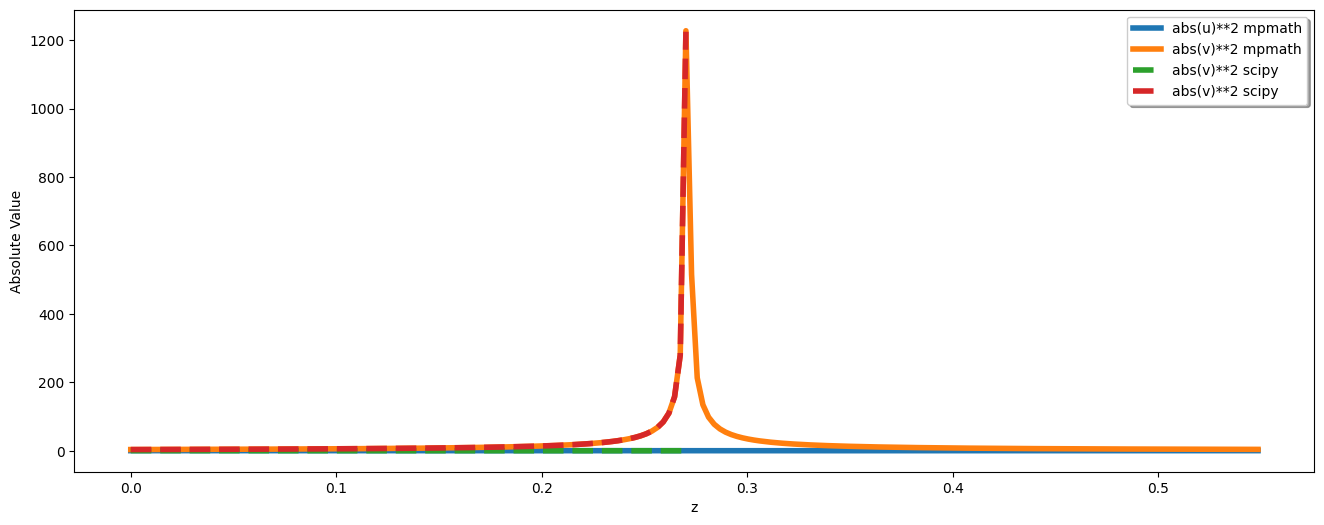

In [245]:
fig = plt.figure(figsize=(16, 6))
plt.plot(z_eval, absolute(u_v_sol_mpmath.T), linestyle="solid", linewidth=4) 
__y_vals__ = absolute(A_sol_scipy.T)
plt.plot(z_eval[0: len(__y_vals__)], __y_vals__, linestyle="dashed", linewidth=4) 
plt.legend(['abs(u)**2 mpmath', 'abs(v)**2 mpmath', 'abs(v)**2 scipy', 'abs(v)**2 scipy'], shadow=True) 
plt.ylabel('Absolute Value')
plt.xlabel('z')
plt.show()

## On the differential equation satisfied by one of the modes

In [246]:
v_as_ln_diff_u = Eq(v(z), solve(dv2_scaled.lhs - dv2_scaled.rhs,v(z))[0]).expand()
v_as_ln_diff_u

Eq(v(z), -alpha/2 - u(z)/2 - Derivative(u(z), z)/(2*u(z)))

In [247]:
diff_u_only_eq = Eq((dv1_scaled.lhs - dv1_scaled.rhs).subs(*v_as_ln_diff_u.args),0)
diff_u_only_eq

Eq(-(-alpha/2 - u(z)/2 - Derivative(u(z), z)/(2*u(z)))*(alpha/2 + 3*u(z)/2 - Derivative(u(z), z)/(2*u(z))) + Derivative(-alpha/2 - u(z)/2 - Derivative(u(z), z)/(2*u(z)), z), 0)

In [248]:
diff_u_only_eq_expanded = diff_u_only_eq.doit().expand()
diff_u_only_eq_expanded

Eq(alpha**2/4 + alpha*u(z) + 3*u(z)**2/4 - Derivative(u(z), (z, 2))/(2*u(z)) + Derivative(u(z), z)**2/(4*u(z)**2), 0)

In [249]:
diff_u_only_eq_expanded = (diff_u_only_eq.lhs*u(z)**2*4).doit().expand()
diff_u_only_eq_expanded.collect(u(z))

alpha**2*u(z)**2 + 4*alpha*u(z)**3 + 3*u(z)**4 - 2*u(z)*Derivative(u(z), (z, 2)) + Derivative(u(z), z)**2

In [250]:
(diff_u_only_eq_lk_expanded.subs([(beta,1),(kappa,1)]).subs(u(z),exp(u(z)))/exp(2*u(z))).doit().expand().collect(diff(u(z),z,2),factor)

-(-alpha + Derivative(u(z), z))*(exp(u(z)) + 1) - Derivative(u(z), (z, 2))

In [251]:
diff_u_only_eq.doit().expand()

Eq(alpha**2/4 + alpha*u(z) + 3*u(z)**2/4 - Derivative(u(z), (z, 2))/(2*u(z)) + Derivative(u(z), z)**2/(4*u(z)**2), 0)

In [252]:
dU.subs([(U(z),f(z)*exp(-alpha*z/3)),(V(z),h(z)*exp(alpha*z/3))]).doit()
dV.subs([(U(z),f(z)*exp(-alpha*z/3)),(V(z),h(z)*exp(alpha*z/3))]).doit()

Eq(-alpha*f(z)*exp(-alpha*z/3)/3 + exp(-alpha*z/3)*Derivative(f(z), z), -alpha*f(z)*exp(-alpha*z/3)/3 - h(z)**2*exp(2*alpha*z/3))

Eq(alpha*h(z)*exp(alpha*z/3)/3 + exp(alpha*z/3)*Derivative(h(z), z), alpha*h(z)*exp(alpha*z/3)/3 + f(z)**2*exp(-2*alpha*z/3))

In [253]:
Uz_sigma

Eq(U(z), sigma(z - z0 - xi[0], g2, g3)*exp(z*(alpha/6 + zw(xi[0], g2, g3)) + c)/sigma(z - z0, g2, g3))

In [254]:
Eq(f(z),Uz_sigma.rhs*exp(alpha*z/3)).simplify()

Eq(f(z), sigma(z - z0 - xi[0], g2, g3)*exp(alpha*z/2 + z*zw(xi[0], g2, g3) + c)/sigma(z - z0, g2, g3))

In [255]:
dU

Eq(Derivative(U(z), z), -alpha*U(z)/3 - V(z)**2)

In [256]:
dV

Eq(Derivative(V(z), z), alpha*V(z)/3 + U(z)**2)

In [257]:
Ufh = Eq(U(z),cos(theta)*f(z)+sin(theta)*h(z))
Vfh = Eq(V(z),sin(theta)*f(z)-cos(theta)*h(z))
Ufh
Vfh

Eq(U(z), f(z)*cos(theta) + h(z)*sin(theta))

Eq(V(z), f(z)*sin(theta) - h(z)*cos(theta))

In [258]:
fhsols = solve([Ufh,Vfh],[f(z),h(z)])
fUV = Eq(f(z), fhsols[f(z)]).simplify()
hUV = Eq(h(z), fhsols[h(z)]).simplify()
fUV
hUV

Eq(f(z), U(z)*cos(theta) + V(z)*sin(theta))

Eq(h(z), U(z)*sin(theta) - V(z)*cos(theta))

In [259]:
dU.subs([Ufh.args, Vfh.args]).doit().expand()

Eq(sin(theta)*Derivative(h(z), z) + cos(theta)*Derivative(f(z), z), -alpha*f(z)*cos(theta)/3 - alpha*h(z)*sin(theta)/3 - f(z)**2*sin(theta)**2 + 2*f(z)*h(z)*sin(theta)*cos(theta) - h(z)**2*cos(theta)**2)

In [260]:
dV.subs([Ufh.args, Vfh.args]).doit().expand()

Eq(sin(theta)*Derivative(f(z), z) - cos(theta)*Derivative(h(z), z), alpha*f(z)*sin(theta)/3 - alpha*h(z)*cos(theta)/3 + f(z)**2*cos(theta)**2 + 2*f(z)*h(z)*sin(theta)*cos(theta) + h(z)**2*sin(theta)**2)

In [261]:
dfhsols = solve([dU.subs([Ufh.args, Vfh.args]).doit().expand(), dV.subs([Ufh.args, Vfh.args]).doit().expand()], [diff(f(z),z),diff(h(z),z)])
for _k in dfhsols:
    Eq(_k, dfhsols[k].subs(3*sin(theta)**2 + 3*cos(theta)**2, 2)).subs(theta,pi/4)

KeyError: k

In [ ]:
uv_plus_subs = [(U(z), U(z)**Rational(3,2)), (V(z), V(z)**Rational(3,2))]
Eq(diff(U(z),z), solve(dU.subs(uv_plus_subs).doit().expand(), diff(U(z),z))[0].expand().collect(U(z),simplify))
Eq(diff(V(z),z), solve(dV.subs(uv_plus_subs).doit().expand(), diff(V(z),z))[0].expand().collect(V(z),simplify))


In [ ]:
1-a-2*b + (2*a + b + 1)

In [393]:
lk_lagrangian

Eq(L(u(z), v(z), Derivative(u(z), z), Derivative(v(z), z)), -alpha*log(v(z)) + delta*v(z) - u(z)*kappa - log(u(z))*Derivative(log(v(z)), z)/2 - log(u(z))*beta + log(v(z))*Derivative(log(u(z)), z)/2)

In [394]:
lagrangian

Eq(L(u(z), v(z), Derivative(u(z), z), Derivative(v(z), z)), -alpha*u(z)*v(z) - delta*u(z)*v(z)**2 - u(z)**2*v(z)*beta + u(z)*Derivative(v(z), z)/2 - v(z)*Derivative(u(z), z)/2)

In [407]:
l_combined = Eq((lagrangian.lhs+ lk_lagrangian.lhs)/2, lk_kinetic - lk_potential + x*kinetic - y*potential)
l_combined

Eq(L(u(z), v(z), Derivative(u(z), z), Derivative(v(z), z)), -alpha*log(v(z)) + delta*v(z) + x*(u(z)*Derivative(v(z), z)/2 - v(z)*Derivative(u(z), z)/2) - y*(alpha*u(z)*v(z) + delta*u(z)*v(z)**2 + u(z)**2*v(z)*beta) - u(z)*kappa - log(u(z))*Derivative(log(v(z)), z)/2 - log(u(z))*beta + log(v(z))*Derivative(log(u(z)), z)/2)

In [410]:
dv1_lk_c = Eq(diff(u(z),z),solve(euler_lagrange_eqs[1].subs(*l_combined.args).doit() , diff(u(z),z))[0]).simplify().expand()
dv2_lk_c = Eq(diff(v(z),z),solve(euler_lagrange_eqs[0].subs(*l_combined.args).doit() , diff(v(z),z))[0]).simplify().expand()
dv1_lk_c = Eq(dv1_lk_c.lhs, dv1_lk_c.rhs.simplify().factor())
dv2_lk_c = Eq(dv2_lk_c.lhs, dv2_lk_c.rhs.simplify().factor())
dv1_lk_c
dv2_lk_c

Eq(Derivative(u(z), z), -(alpha*y*u(z)*v(z) + alpha + 2*delta*y*u(z)*v(z)**2 - delta*v(z) + y*u(z)**2*v(z)*beta)*u(z)/(x*u(z)*v(z) - 1))

Eq(Derivative(v(z), z), (alpha*y*u(z)*v(z) + delta*y*u(z)*v(z)**2 + 2*y*u(z)**2*v(z)*beta + u(z)*kappa + beta)*v(z)/(x*u(z)*v(z) - 1))

In [406]:
dv1_lk_c.subs(u(z),f(z)*h(z)).doit()

Eq(f(z)*Derivative(h(z), z) + h(z)*Derivative(f(z), z), alpha*x*f(z)*h(z)/(x - f(z)*h(z)*v(z)) + alpha*f(z)**2*h(z)**2*v(z)/(x - f(z)*h(z)*v(z)) - delta*x*f(z)*h(z)*v(z)/(x - f(z)*h(z)*v(z)) + 2*delta*f(z)**2*h(z)**2*v(z)**2/(x - f(z)*h(z)*v(z)) + f(z)**3*h(z)**3*v(z)*beta/(x - f(z)*h(z)*v(z)))